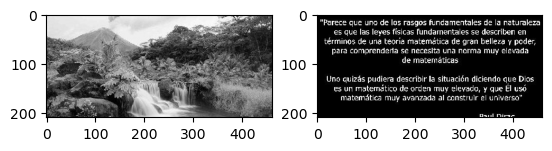

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

src1 = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\paisaje_foto.jpeg")
src2 = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\paisaje_texto.jpeg")
src1 = cv.cvtColor(src1, cv.COLOR_BGR2RGB)
src2 = cv.cvtColor(src2, cv.COLOR_BGR2RGB)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(src1)
ax2.imshow(src2)

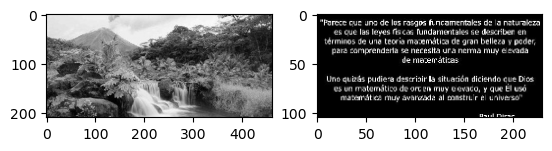

In [54]:
mask = cv.resize(src2,(int(src1.shape[1]/2),int(src1.shape[0]/2)),cv.INTER_CUBIC)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(src1)
ax2.imshow(mask)

## Restauración de la foto

> **OR** del paisaje y las letras

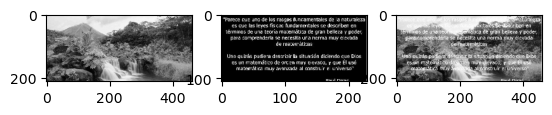

In [55]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
src_or = cv.bitwise_or(src1,src2)
ax1.imshow(src1)
ax2.imshow(mask)
ax3.imshow(src_or)

> Desenfoque **gausiano**

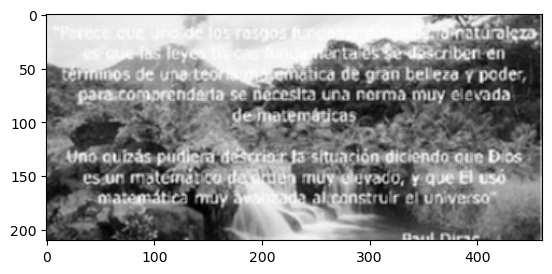

In [65]:
src_gausiano = cv.GaussianBlur(src_or, (3,3), sigmaX=100, sigmaY=100)
plt.imshow(src_gausiano, cmap="gray")

> **AND** con el gausiano y la máscara

(210, 461, 3)
(210, 461, 3)


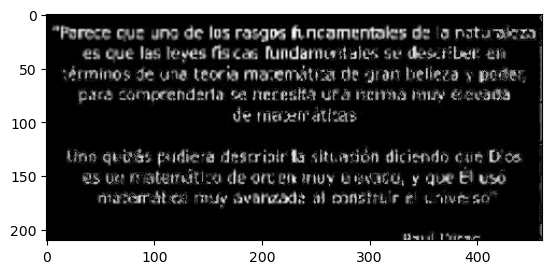

In [66]:
mask = cv.resize(mask, (int(src_gausiano.shape[1]),int(src_gausiano.shape[0])),cv.INTER_CUBIC)
print(mask.shape)
print(src_gausiano.shape)
letras_blancas= cv.bitwise_and(src_gausiano, mask)
plt.imshow(letras_blancas, cmap="gray")

> **NOT** de letras blancas

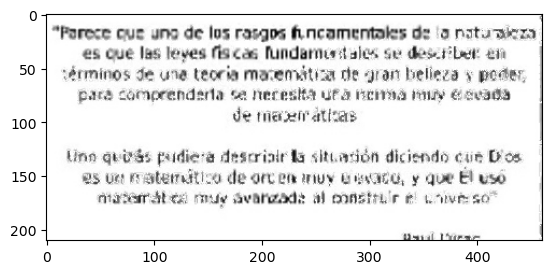

In [67]:
letras_negras = cv.bitwise_not(letras_blancas,(3,3))
plt.imshow(letras_negras, cmap="gray")

> **AND** de paisaje_letras y letras negras

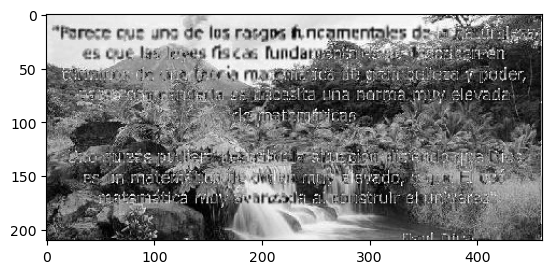

In [78]:
paisajeletras_negras = cv.bitwise_and(src_or, letras_negras)
plt.imshow(paisajeletras_negras, cmap="gray")

> **AND** del gausiano con las letras normales

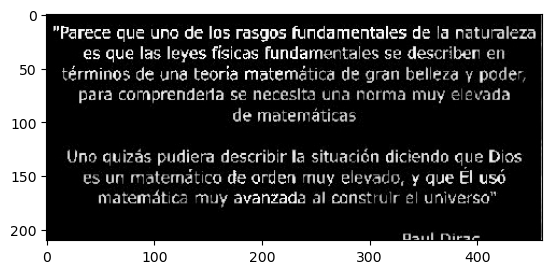

In [74]:
gausiano_letrasnormales = cv.bitwise_and(src_gausiano, src2)
plt.imshow(gausiano_letrasnormales, cmap="gray")

> **OR** final de paisaje con las letras negras y el gausiano con las letras normales

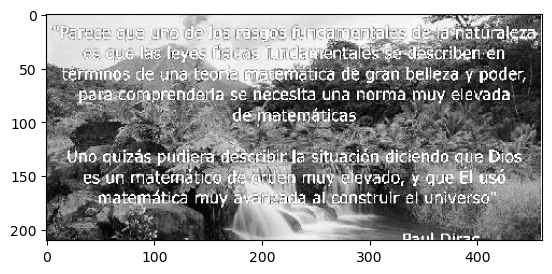

In [79]:
or_final = cv.bitwise_or(paisajeletras_negras, gausiano_letrasnormales)
plt.imshow(or_final, cmap= "gray")